# DATA VISUALIZATION ASSIGNEMENT - Maria Pintos Relat

In [1]:
# Import libraries
import pandas as pd
import io

from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [2]:
# Import data
from google.colab import files
uploaded = files.upload()

Saving customer_personality.csv to customer_personality.csv


In [3]:
# Name data set
cust_pers = pd.read_csv(io.BytesIO(uploaded['customer_personality.csv']))
cust_pers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# CLEANING DATA SET

In [6]:
# Making a copy of the data set
general_copy = cust_pers.copy()

In [7]:
# Dropping missing values
gc_wna = general_copy.dropna()
gc_wna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [8]:
gc_wna.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
# Detecting Outliers for 'Income'
income = gc_wna['Income']

income

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2216, dtype: float64

In [10]:
Q1income = np.percentile(income, 25,
                   interpolation = 'midpoint')
 
Q3income = np.percentile(income, 75,
                   interpolation = 'midpoint')
IQRincome = Q3income - Q1income
print(IQRincome)

33273.0


In [11]:
# Cleaning data frame of 'Income' outliers
gc_wna_ic = gc_wna[~((income < (Q1income - 1.5 * IQRincome)) |(income > (Q3income + 1.5 * IQRincome)))]
gc_wna_ic.shape

(2208, 29)

# QUESTION 1.How has changed the average income across time?

In [12]:
#Creating "Year" from date consumer added to the company
gc_wna_ic['Year_Dt_Customer'] = pd.DatetimeIndex(gc_wna_ic['Dt_Customer']).year
gc_wna_ic.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Dt_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,2012
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,2014
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,2013
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,2014
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,2014


In [13]:
# Getting division by groups of year added
year_enroll = gc_wna_ic.groupby("Year_Dt_Customer")

In [14]:
year_enroll.describe()

ID                                                  \
                   count         mean          std  min      25%     50%   
Year_Dt_Customer                                                           
2012               489.0  5738.132924  3250.771318  9.0  3104.00  5667.0   
2013              1168.0  5487.560788  3262.397081  0.0  2659.75  5373.0   
2014               551.0  5663.264973  3217.890555  1.0  2950.00  5529.0   

                                   Year_Birth               ... Z_Revenue  \
                      75%      max      count         mean  ...       75%   
Year_Dt_Customer                                            ...             
2012              8700.00  11133.0      489.0  1969.809816  ...      11.0   
2013              8289.25  11191.0     1168.0  1968.389555  ...      11.0   
2014              8407.50  11188.0      551.0  1968.802178  ...      11.0   

                       Response                                               
                   max    count      mean       std  min  25%  50%  75%  max  
Year_Dt_Customer                                                              
2012              11.0    489.0  0.269939  0.444382  0.0  0.0  0.0  1.0  1.0  
2013              11.0   1168.0  0.130993  0.337537  0.0  0.0  0.0  0.0  1.0  
2014              11.0    551.0  0.087114  0.282259  0.0  0.0  0.0  0.0  1.0  

[3 rows x 208 columns]

In [15]:
# Grouping customers by the relation between their income and the year they first bought at the company
gc_wna_ic.groupby(['Year_Dt_Customer'])['Income'].mean()

Year_Dt_Customer
2012    50925.997955
2013    51542.755137
2014    52454.304900
Name: Income, dtype: float64

In [16]:
# Calculating the average income from every year of entry
avg_income = gc_wna_ic.groupby(['Year_Dt_Customer'])['Income'].mean().reset_index(name='Income')
print(avg_income)

   Year_Dt_Customer        Income
0              2012  50925.997955
1              2013  51542.755137
2              2014  52454.304900


MATPLOTLIB

Text(0.5, 1.0, 'Evolution of average income of company customers over time')

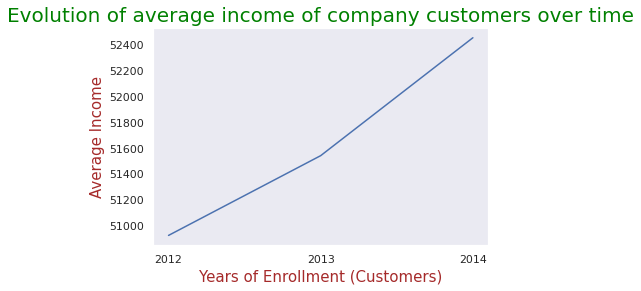

In [65]:
# Plotting the relationship: 
plt.plot(np.sort(avg_income['Year_Dt_Customer']).astype(str),avg_income['Income'])

# Detailing graph esthetics
font1 = {'family':'arial','color':'green','size':20}
font2 = {'family':'arial','color':'brown','size':15}
plt.xlabel("Years of Enrollment (Customers)",fontdict = font2)
plt.ylabel("Average Income",fontdict = font2)
plt.title('Evolution of average income of company customers over time', fontdict = font1)

SEABORN

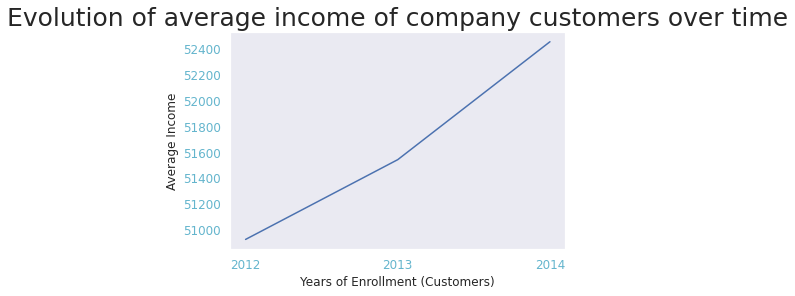

In [103]:
# Plotting the relationship:
sns.set( style = "dark" ) 
ax = sns.lineplot(x=years, y="Income", data=avg_income)
ax.set(xlabel='Years of Enrollment (Customers)', ylabel='Average Income')
plt.title('Evolution of average income of company customers over time', fontsize=25)
ax.tick_params(axis='x',labelsize=12, colors='c')
ax.tick_params(axis='y',labelsize=12, colors='c')

PLOTLY

In [60]:
# Plotting the relationship
years = avg_income['Year_Dt_Customer'].astype(str)
fig_income = px.line(avg_income, x=years, y='Income', title='Evolution of average income of company customers over time')
fig_income.update_xaxes(title_text='Years of Enrollment (Customers)')
fig_income.update_yaxes(title_text='Average Income')
fig_income.update_layout(
    font_family="Arial",
    font_color="purple",
    font_size=15,
    title_font_family="Arial",
    title_font_color="orange",
    title_font_size=25)
fig_income.update_xaxes(title_font_family="Arial")
fig_income.update_yaxes(title_font_family="Arial")
fig_income.show()

# QUESTION 2. Which is the distribution of the marital status?

In [67]:
# Grouping by how many people are in every 'Marital Status' category
marital_status = gc_wna_ic.groupby('Marital_Status')['ID'].count().reset_index()
marital_status

,Marital_Status,ID
0,Absurd,2
1,Alone,3
2,Divorced,231
3,Married,854
4,Single,471
5,Together,569
6,Widow,76
7,YOLO,2


MATPLOTLIB

([<matplotlib.patches.Wedge at 0x7f0e30261c90>,
 [Text(-0.16888243563548494, 1.0869584734173732, 'Divorced'),
  Text(-1.19031955531936, -0.15211625890851208, 'Married'),
  Text(-0.1213091830953966, -1.0932904838590372, 'Others'),
  Text(0.6897357697073787, -0.8568923899686414, 'Single'),
  Text(0.9160631638905092, 0.608956714194786, 'Together')],
 [Text(-0.09211769216480996, 0.5928864400458399, '10%'),
  Text(-0.6943530739362932, -0.08873448436329871, '39%'),
  Text(-0.06616864532476177, -0.5963402639231111, '4%'),
  Text(0.37621951074947924, -0.46739584907380427, '21%'),
  Text(0.4996708166675504, 0.33215820774261057, '26%')])

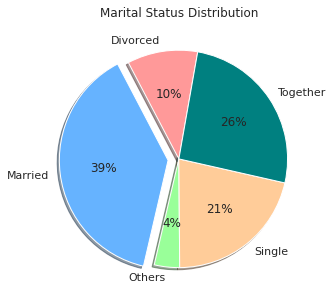

In [247]:
# Plotting the distribution for the 'Marital Status' categories:
marital_status_copy = marital_status.copy()
marital_status_copy.loc[marital_status_copy['ID'] < 77, 'Marital_Status'] = 'Others'

marital_status_copy = marital_status_copy.groupby('Marital_Status')['ID'].sum().reset_index()
marital_labels = marital_status_copy['Marital_Status']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#008080']
plt.title('Marital Status Distribution')
plt.pie(marital_status_copy['ID'], labels=marital_labels, autopct='%.0f%%', explode = (0, 0.1, 0, 0, 0), shadow=True, startangle=80, colors=colors)

SEABORN 

([<matplotlib.patches.Wedge at 0x7f0e300fdb10>,
 [Text(-0.16888243563548494, 1.0869584734173732, 'Divorced'),
  Text(-1.19031955531936, -0.15211625890851208, 'Married'),
  Text(-0.1213091830953966, -1.0932904838590372, 'Others'),
  Text(0.6897357697073787, -0.8568923899686414, 'Single'),
  Text(0.9160631638905092, 0.608956714194786, 'Together')],
 [Text(-0.09211769216480996, 0.5928864400458399, '10%'),
  Text(-0.6943530739362932, -0.08873448436329871, '39%'),
  Text(-0.06616864532476177, -0.5963402639231111, '4%'),
  Text(0.37621951074947924, -0.46739584907380427, '21%'),
  Text(0.4996708166675504, 0.33215820774261057, '26%')])

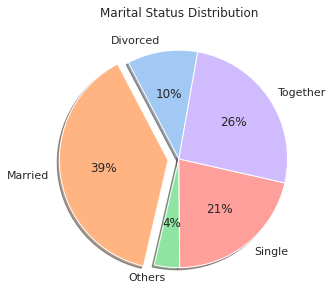

In [250]:
# Plotting the distribution for the 'Marital Status' categories: The Python data visualization library Seaborn can be use to add a color palette to an already existing Matplotlib made pie chart
import seaborn
palette_color = seaborn.color_palette('pastel')
plt.title('Marital Status Distribution')
plt.pie(marital_status_copy['ID'], labels=marital_labels, colors=palette_color, autopct='%.0f%%', explode = (0, 0.1, 0, 0, 0), shadow=True, startangle=80)

PLOTLY

In [114]:
# Plotting the distribution for the 'Marital Status' categories:
fig_marital = px.pie(marital_status_copy, values='ID', names='Marital_Status', title='Distribution of Marital Status')
fig_marital.update_layout(
    legend_title = 'Marital Status Categories',
    title_font = dict(family='timesnewroman', size=25, color='black'),
    title_x=0.5,
    font_family="timesnewroman",
    font_color="black",
    legend_title_font_color="black"
   )
fig_marital.show()

MATPLOTLIB

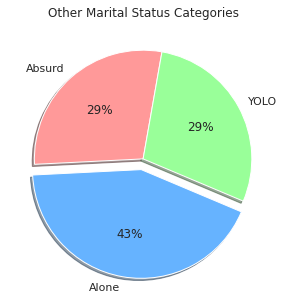

In [248]:
# Plotting the distribution for Other Marital Status categories (Absurd, Alone and YOLO)
m_s_other = {'Absurd':2, 'Alone':3, 'YOLO':2}
m_s_other
labels = list(m_s_other.keys())
values = list(m_s_other.values())
colors = ['#ff9999','#66b3ff','#99ff99']
plt.title('Other Marital Status Categories')
plt.pie(values, labels=labels, autopct='%.0f%%', colors=colors, explode= (0,0.1, 0), shadow=True, startangle=80)
plt.show()

SEABORN

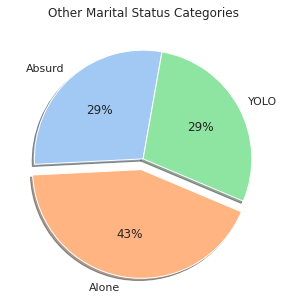

In [249]:
# Plotting the distribution for Other Marital Status categories (Absurd, Alone and YOLO)
m_s_other = {'Absurd':2, 'Alone':3, 'YOLO':2}
m_s_other
labels = list(m_s_other.keys())
values = list(m_s_other.values())
palette_color = seaborn.color_palette('pastel')
plt.title('Other Marital Status Categories')
plt.pie(values, labels=labels, colors=palette_color, autopct='%.0f%%', explode=(0,0.1,0), startangle=80, shadow=True)
plt.show()

PLOTLY

In [118]:
# Plotting the distribution for Other Marital Status categories (Absurd, Alone and YOLO)
import plotly.graph_objects as go

labels_others = ['YOLO', 'Alone', 'Absurd']
values_others = [2, 3, 2]

fig_others = go.Figure(data = [go.Pie(labels = labels_others, values = values_others, title='Distribution of Other Marital Status')])
fig_others.update_layout(
    legend_title = 'Other Marital Status Categories',
    title_font = dict(family='timesnewroman', size=30, color='black'),
    title_x=0.5,
    font_family="timesnewroman",
    font_color="black",
    legend_title_font_color="black"
   )
fig_others.show()

# QUESTION 3. How many people do we have per age? Which is the average age?

In [119]:
#Making a copy of the data set for editing
gc_wna_ic2 = gc_wna_ic.copy()

In [121]:
# Making a new column for the customer's age
gc_wna_ic2['Age'] = 2022 - gc_wna_ic2['Year_Birth']
gc_wna_ic2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Dt_Customer,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,2012,65
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,2014,68
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,2013,57
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,2014,38
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,2014,41


In [122]:
# Computing the average age of the consumers
avg_age = gc_wna_ic2['Age'].mean()
avg_age

53.192934782608695

MATPLOTLIB

(array([ 2.,  5.,  3.,  5., 13., 15., 18., 29., 29., 27., 41., 32., 38.,
        41., 43., 38., 39., 53., 76., 50., 88., 82., 69., 71., 78., 85.,
        75., 70., 51., 44., 50., 74., 41., 44., 44., 35., 49., 50., 52.,
        41., 55., 48., 49., 35., 52., 42., 29., 29., 21., 16., 16.,  8.,
         7.,  6.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 1

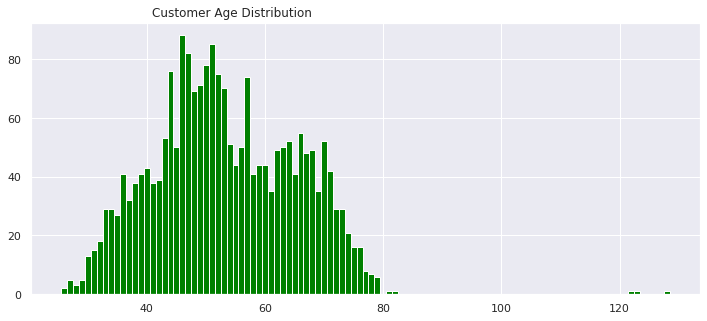

In [241]:
# Plotting a histogram for the age distribution: 
age = gc_wna_ic2['Age']
plt.title("Customer Age Distribution", fontsize=12, x=0.3, y=1)
plt.hist(age, bins=range(min(age), max(age)+1,1) , align='left', histtype='bar', rwidth=1, color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Customer Age IQR Distribution')

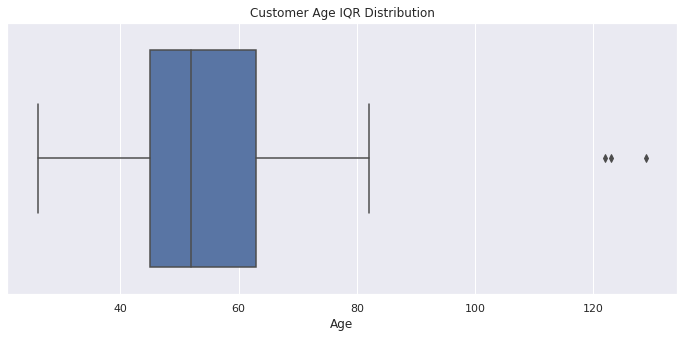

In [246]:
# Checking for outliers
sns.boxplot(age)
plt.title('Customer Age IQR Distribution', fontsize=12)

In [125]:
# Finding out the exact values of the outliers
from matplotlib.cbook import boxplot_stats  
boxplot_stats(gc_wna_ic2.Age).pop(0)['fliers']

array([122, 129, 123])

In [131]:
# Computing first and third quartile, as well as IQR:
Q1age = np.percentile(age, 25,
                   interpolation = 'midpoint')
 
Q3age = np.percentile(age, 75,
                   interpolation = 'midpoint')
IQRage = Q3age - Q1age
print(IQRage)

18.0


In [130]:
# Cleaning variable 'age' of outliers and counting total observations:
age_clean = age[~((age < (Q1age - 1.5 * IQRage)) |(age > (Q3age + 1.5 * 
IQRage)))]
age_clean.count()

2205

MATPLOTLIB

(array([ 2.,  5.,  3.,  5., 13., 15., 18., 29., 29., 27., 41., 32., 38.,
        41., 43., 38., 39., 53., 76., 50., 88., 82., 69., 71., 78., 85.,
        75., 70., 51., 44., 50., 74., 41., 44., 44., 35., 49., 50., 52.,
        41., 55., 48., 49., 35., 52., 42., 29., 29., 21., 16., 16.,  8.,
         7.,  6.,  0.,  2.]),
 array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
        43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
        60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
        77, 78, 79, 80, 81, 82]),
 <a list of 56 Patch objects>)

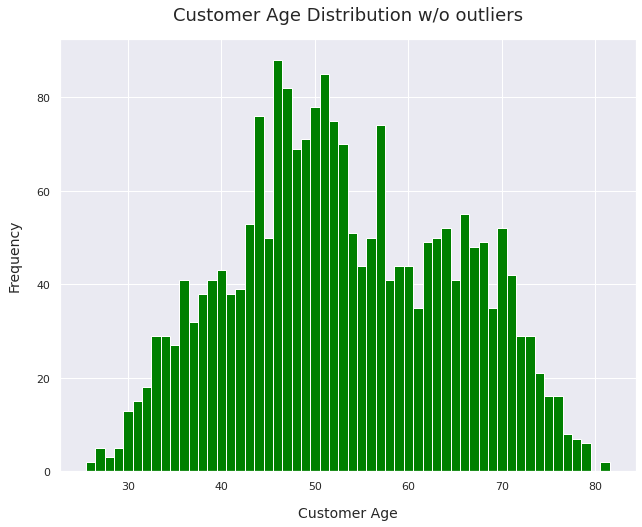

In [243]:
# Plotting the final histogram for age without outliers
fig=plt.figure(figsize=(8,6))
his=fig.add_axes([0,0,1,1])
plt.title("Customer Age Distribution w/o outliers", fontsize=18, y=1.03)
plt.xlabel("Customer Age", fontsize=14, labelpad=15)
plt.ylabel("Frequency", fontsize=14, labelpad=15)
plt.hist(age_clean, bins=range(min(age_clean), max(age_clean)+1,1) , align='left', histtype='bar', rwidth=1, color='green')

PLOTLY

In [244]:
# Plotting the final histogram for age without outliers:
fig_hist = px.histogram(age_clean, x=['Age'],
                   title='Customer Age Distribution w/o outliers',
                   labels={'value':'Age of customers'},
                   nbins=57, color_discrete_sequence=['indianred'])
fig_hist.update_xaxes(range= [0, max(age_clean)+1], showticklabels=True)
fig_hist.show()

SEABORN

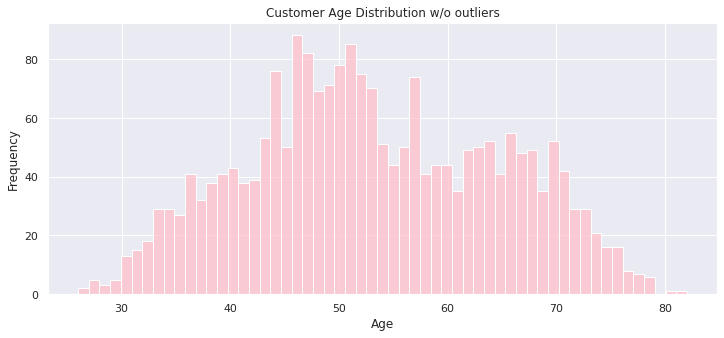

In [245]:
# Plotting the final histogram for age without outliers:
sns.histplot(age_clean, color="pink", bins=57)
plt.title('Customer Age Distribution w/o outliers', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Frequency')
sns.set(rc={"figure.figsize":(12,5)})

# QUESTION 4. Which is the relation between recency and number of deal purchases?

In [177]:
# Making a copy of the data set
gc_wna_ic3 = gc_wna_ic.copy()

In [179]:
# Defining variable for recency:
recency = gc_wna_ic3['Recency']
recency

0       58
1       38
2       26
3       26
4       94
        ..
2235    46
2236    56
2237    91
2238     8
2239    40
Name: Recency, Length: 2208, dtype: int64

In [180]:
# Defining variable for number of deals:
num_deals = gc_wna_ic3['NumDealsPurchases']
num_deals

0       3
1       2
2       1
3       2
4       5
       ..
2235    2
2236    7
2237    1
2238    2
2239    3
Name: NumDealsPurchases, Length: 2208, dtype: int64

MATPLOTPLIB

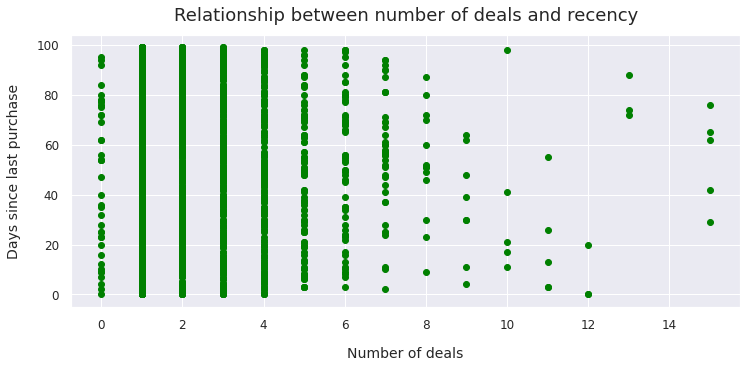

In [183]:
# Plotting the relationship between the number of deals and recency
plt.scatter(num_deals, recency, c='green')
plt.title("Relationship between number of deals and recency", fontsize=18, y=1.03)
plt.xlabel("Number of deals", fontsize=14, labelpad=15)
plt.ylabel("Days since last purchase", fontsize=14, labelpad=15)
plt.tick_params(labelsize=12, pad=6);

PLOTLY

In [185]:
# Plotting the relationship between the number of deals and recency
fig_scatter = px.scatter(gc_wna_ic3, x='NumDealsPurchases', y='Recency', title="Relationship between number of deals and recency", color_discrete_sequence=['indianred'])
fig_scatter.show()

SEABORN

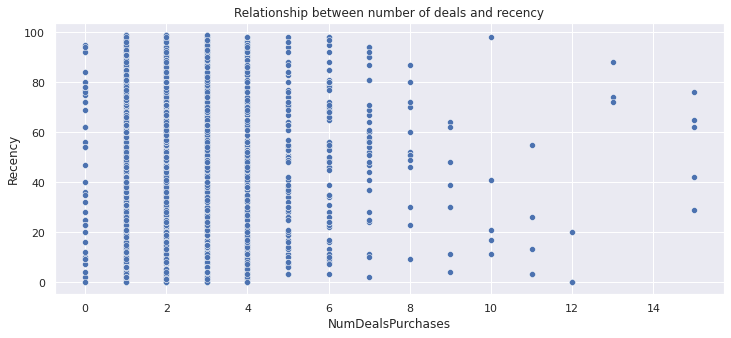

In [190]:
# Plotting the relationship between the number of deals and recency
sns.set_color_codes("dark")
ax = sns.scatterplot(x="NumDealsPurchases", y="Recency", data=gc_wna_ic3, palette='Blues')
title = 'Relationship between number of deals and recency'
plt.title(title)
plt.show()

In [191]:
# Getting the sorted unique values for the number of purchases
num_deal = gc_wna_ic3['NumDealsPurchases'].unique()
num_deals = np.sort(num_deal)
num_deals

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15])

In [192]:
# Grouping average recency by number of deal purchases
num_deal_rec = gc_wna_ic3.groupby(['NumDealsPurchases'])['Recency'].mean()
num_deal_rec

NumDealsPurchases
0     45.820513
1     48.896875
2     49.212982
3     48.703072
4     50.711230
5     46.021277
6     52.200000
7     56.076923
8     52.214286
9     36.000000
10    37.600000
11    20.000000
12     6.666667
13    78.000000
15    54.800000
Name: Recency, dtype: float64

MATPLOTLIB

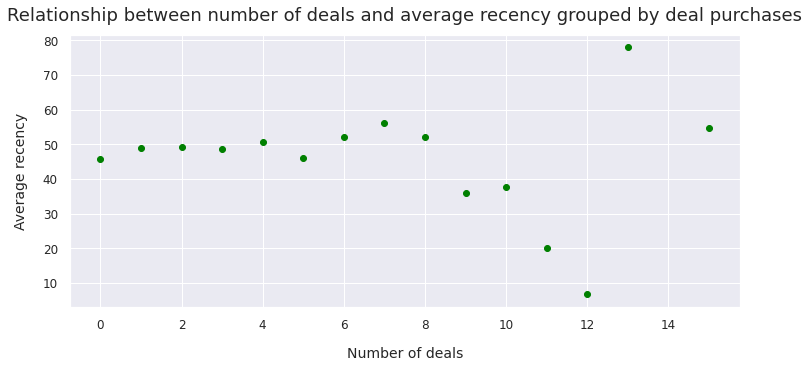

In [196]:
# Plotting the relationship between number of deal purchases and average recency grouped by deal purchases 
plt.scatter(num_deals, num_deal_rec, color='green')
plt.title("Relationship between number of deals and average recency grouped by deal purchases", fontsize=18, y=1.03)
plt.xlabel("Number of deals", fontsize=14, labelpad=15)
plt.ylabel("Average recency", fontsize=14, labelpad=15)
plt.tick_params(labelsize=12, pad=6);

PLOTLY

In [212]:
# Plotting the relationship between number of deal purchases and average recency grouped by deal purchases 
fig_scatter = px.scatter(gc_wna_ic3, x=num_deals, y=num_deal_rec, title="Relationship between number of deals and average recency grouped by deal purchases", color_discrete_sequence=['indianred'],  labels={'x':'Number of Deal Purchases', 'y': 'num_deal_rec'})
fig_scatter.show()
# In this graph we can appreciate the change of the general tendency from 8 deal purchases onwards (outliers)

# QUESTION 5. How is income distributed depending on education?

In [203]:
# Making a new variable for education
educ = gc_wna_ic3['Education'].unique()

In [204]:
# Group income receivers by their level of education
income_educ = gc_wna_ic3.groupby(['Education'])['Income'].count().reset_index(name='Income')
print(income_educ)

    Education  Income
0    2n Cycle     200
1       Basic      54
2  Graduation    1113
3      Master     364
4         PhD     477


PLOTLY

In [221]:
#Plot distribution of the company customer's by their level of education:
fig = px.violin(gc_wna_ic3, y="Income", x="Education", box=True, color_discrete_sequence=['indianred'], title='Distribution of income by level of education',
          hover_data=gc_wna_ic3.columns)
fig.show()


MATPLOTLIB

In [206]:
# Creating a variable of income grouped by education (list of lists)
inc_educ = (gc_wna_ic3.groupby('Education')["Income"].agg(lambda x: list(x)))

inc_educ


Education
2n Cycle      [33812.0, 23718.0, 7500.0, 88194.0, 26326.0, 2...
Basic         [7500.0, 24594.0, 9548.0, 28249.0, 24882.0, 24...
Graduation    [58138.0, 46344.0, 71613.0, 26646.0, 55635.0, ...
Master        [62513.0, 59354.0, 76995.0, 10979.0, 38620.0, ...
PhD           [58293.0, 33454.0, 30351.0, 5648.0, 82800.0, 5...
Name: Income, dtype: object

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x7f0e30bb3cd0>>

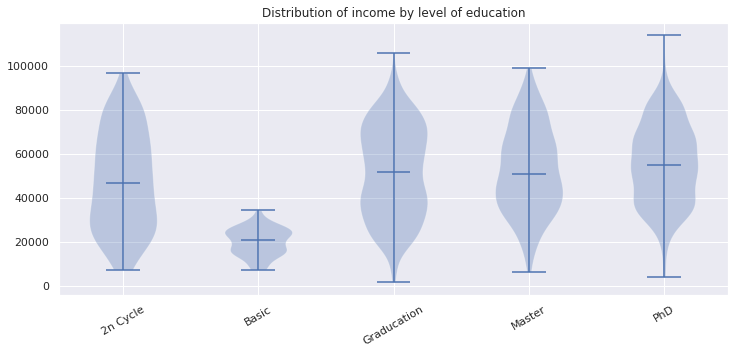

In [218]:
#Plot distribution of the company customer's by their level of education:
labels = ['2n Cycle', 'Basic', 'Graducation', 'Master', 'PhD']
fig, ax = plt.subplots()
ax.set_title('Distribution of income by level of education')
ax.violinplot(inc_educ, showmedians=True)

# set x-axis tick labels
ax.set_xticks(np.arange(1, len(labels)+1))
ax.set_xticklabels(labels, rotation=30)
ax.set


SEABORN

Text(0.5, 1.0, 'Distribution of income by level of education')

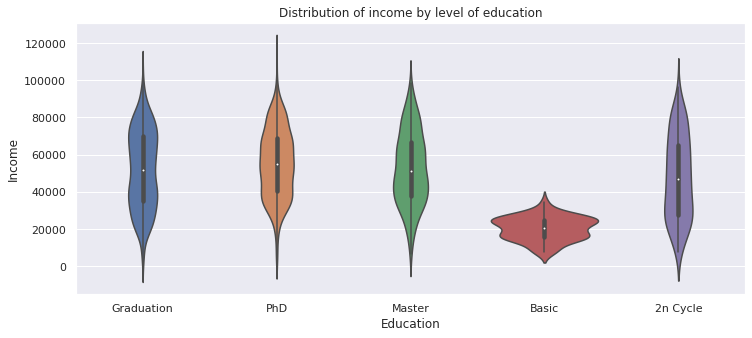

In [214]:
#Plot distribution of the company customer's by their level of education:
seaborn.violinplot(x="Education", y="Income", data=gc_wna_ic3).set_title('Distribution of income by level of education')